# Projeto 3
## André Ejzenmesser
## Vinicius Bonelli

Variáveis escolhidas: Acesso a internet por 100 pessoas e IDH

Variável resposta: Indice de percepção de corrupção (Corruption Perception Index - CPI)

In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/AndreEjz/Desktop/CDP3


In [3]:
d1 = pd.read_excel('CDados.xlsx', index_col=0)
d2 = pd.read_excel('Corrupcao.xlsx', index_col=0)

In [4]:
d2.head()

,CPI
Paises,
Afghanistan,1.4
Albania,3.3
Algeria,2.9
Angola,1.9
Argentina,2.9


In [5]:
d1.head()

,Internet,IDH
Países,,
Abkhazia,NaN,NaN
Afghanistan,3.246306,0.387
Akrotiri and Dhekelia,NaN,NaN
Albania,41.200000,0.734
Algeria,11.230000,0.691


In [6]:
dados = d2.join(d1, how='outer')
dados.head()

,CPI,Internet,IDH
Abkhazia,NaN,NaN,NaN
Afghanistan,1.4,3.246306,0.387
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,3.3,41.200000,0.734
Algeria,2.9,11.230000,0.691


In [7]:
dados=dados[~np.isnan(dados.CPI)]
dados=dados[~np.isnan(dados.Internet)]
dados=dados[~np.isnan(dados.IDH)]

dados.shape

(162, 3)

In [8]:
X = 'Internet'
Y = 'CPI'
n = len(dados[X])

In [9]:
media_x = 0
media_y = 0
soma_xy = 0
soma_x2 = 0

for i in range (n):
    media_x += dados[X][i]/n
    media_y += dados[Y][i]/n
    soma_xy += dados[X][i]*dados[Y][i]
    soma_x2 += dados[X][i]**2

B1 = (soma_xy - n*media_x*media_y)/(soma_x2 - n*((media_x)**2))
print(B1)

0.0693905895358


In [10]:
B0 = -B1*media_x + media_y
print(B0)

1.98634578963


In [11]:
variancia_x = 0
variancia_y = 0
for i in range (n):
    variancia_x += (dados[X][i] - media_x)**2
    variancia_y += (dados[Y][i] - media_y)**2
    
dp_x = np.sqrt(variancia_x)
dp_y = np.sqrt(variancia_y)
correlacao_xy = dp_y/dp_x
print("Correlação(XY) =", correlacao_xy)

Correlação(XY) = 0.0790962406425


____
## Análise Descritiva

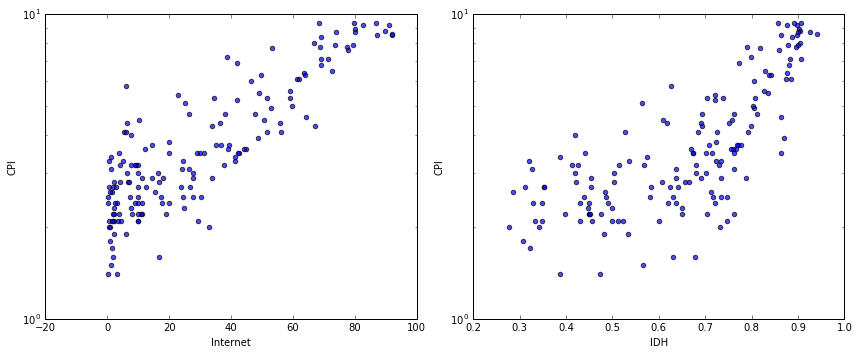

In [22]:
f, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(dados.Internet, dados[Y], alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("Internet")
ax[0].set_ylabel(Y)
ax[0].set_yscale('log')

ax[1].scatter(dados.IDH, dados[Y], alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("IDH")
ax[1].set_ylabel(Y)
ax[1].set_yscale('log')

plt.tight_layout(1)


In [14]:
dados.corr(method='pearson')

,CPI,Internet,IDH
CPI,1.000000,0.877293,0.728073
Internet,0.877293,1.000000,0.856976
IDH,0.728073,0.856976,1.000000


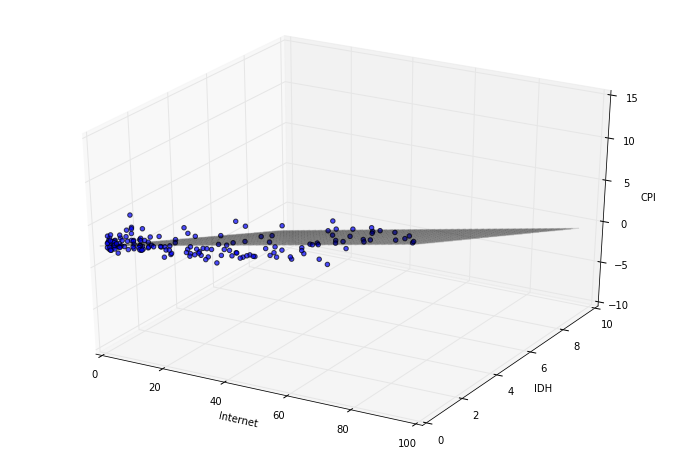

In [16]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='CPI ~ Internet + IDH', data = dados)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 100, 2)                # generate a mesh
y_surf = np.arange(0, 10, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'Internet': x_surf.ravel(), 'IDH': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(dados['Internet'], dados['IDH'], dados['CPI'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlim(0,100)
ax.set_ylim(0,10)
ax.set_xlabel('Internet')
ax.set_ylabel('IDH')
ax.set_zlabel('CPI')